# Classifier to predict whether the cancer is malignant or benign

Based on the information from the dataset of Breast Cancer Wisconsin , we will make a classifier to predict whether the cancer is malignant or benign.

## Importing libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import datetime
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

## Configure Matplotlib

In [2]:
matplotlib.style.use('ggplot')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
matplotlib.rcParams['figure.figsize'] = 15, 6
plt.style.use('fivethirtyeight')

## Load data

In [3]:
df_cancer = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data")
df_cancer.columns = ['ID','Clump','UnifSize','UnifShape','MargAdh','SingEpiSize','BareNuc','BlandChrom','NormalNucl','Mit','Class']
# Variables
print("Cancer Data has {} data points with {} variables each.".format(*df_cancer.shape))

Cancer Data has 698 data points with 11 variables each.


## Data description

Dataset containing information from patient cell samples, this information is contained in the ‘Clump’ to ‘Mit’ fields. Values are graded from 1 to 10, with 1 being the closest to benign. The 'Class' field contains the diagnosis, as confirmed by separate medical procedures, whether the samples are benign (value = 2) or malignant (value = 4).

The Cancer data frame has 698 rows and 10 columns.

This data frame contains the following columns:

ID: Sample code number id number

Clump Thickness 1 - 10

Uniformity of Cell Size 1 - 10

Uniformity of Cell Shape 1 - 10

Marginal Adhesion 1 - 10

Single Epithelial Cell Size 1 - 10

Bare Nuclei 1 - 10

Bland Chromatin 1 - 10

Normal Nucleoli 1 - 10

Mitoses 1 - 10

Class: (2 for benign, 4 for malignant)

## Explore data

In [4]:
df_cancer.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormalNucl,Mit,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [5]:
# data types of columns
df_cancer.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormalNucl      int64
Mit             int64
Class           int64
dtype: object

In [6]:
# Check missing value
df_cancer.isnull().sum()

ID             0
Clump          0
UnifSize       0
UnifShape      0
MargAdh        0
SingEpiSize    0
BareNuc        0
BlandChrom     0
NormalNucl     0
Mit            0
Class          0
dtype: int64

## Class distribution

(array([0, 1]), <a list of 2 Text xticklabel objects>)

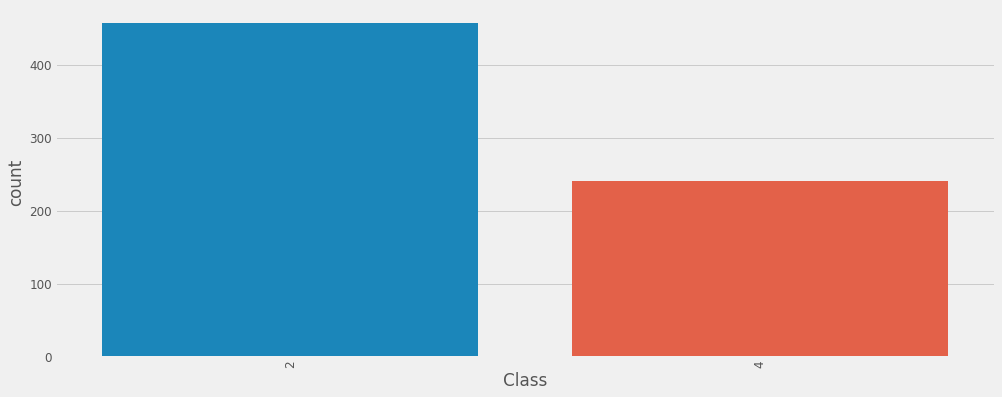

In [7]:
sns.countplot(x = 'Class', data = df_cancer, order = df_cancer['Class'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)

## Delete first column "ID"

In [8]:
del df_cancer['ID']

## Distribution of the classes based on Clump thickness

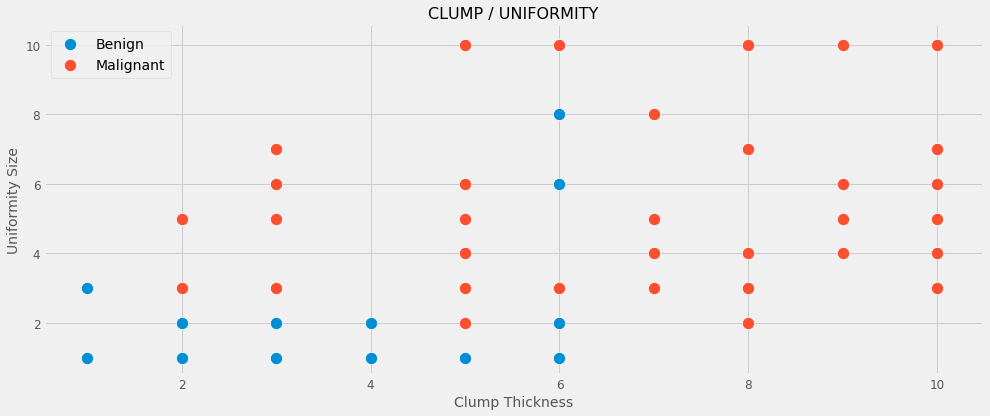

In [9]:
benign_samples = df_cancer[df_cancer['Class'] == 2][0:50]
malignant_samples = df_cancer[df_cancer['Class'] == 4][0:50]

sns.scatterplot(benign_samples['Clump'], benign_samples['UnifSize'], s = 150, label = 'Benign')
sns.scatterplot(malignant_samples['Clump'], malignant_samples['UnifSize'], s = 150, label = 'Malignant')
plt.legend(fontsize = 14)
plt.title('CLUMP / UNIFORMITY', fontsize = 16)
plt.xlabel('Clump Thickness', fontsize = 14)
plt.ylabel('Uniformity Size', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

## Prepare Dataset for Modeling

In [10]:
# Convert "Barenuc" to integer
df_cancer = df_cancer[pd.to_numeric(df_cancer['BareNuc'], errors='coerce').notnull()]
df_cancer['BareNuc'] = df_cancer['BareNuc'].astype('int64')
df_cancer.dtypes 

Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormalNucl     int64
Mit            int64
Class          int64
dtype: object

In [11]:
# Check what percentage of each column's data is missing
df_cancer.isnull().sum()/len(df_cancer)

Clump          0.0
UnifSize       0.0
UnifShape      0.0
MargAdh        0.0
SingEpiSize    0.0
BareNuc        0.0
BlandChrom     0.0
NormalNucl     0.0
Mit            0.0
Class          0.0
dtype: float64

## Shuffle and Split Data

In [12]:
X_var = np.asarray(df_cancer.drop('Class', axis = 1))
y_var = np.asarray(df_cancer['Class'])
X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.2, random_state = 4)

## Create Model

In [13]:
#create a classifier
cls = svm.SVC(kernel="linear")
#train the model
cls.fit(X_train,y_train)
#predict the response
pred = cls.predict(X_test)

## Testing the Model

In [14]:
# Accuracy
print("Acuracy:", metrics.accuracy_score(y_test,y_pred=pred))

# Precision score
print("Precision:", metrics.precision_score(y_test,y_pred=pred,pos_label=4))

# Recall score
print("Recall" , metrics.recall_score(y_test,y_pred=pred,pos_label=4))

# Report
print(metrics.classification_report(y_test, y_pred=pred))

Acuracy: 0.9635036496350365
Precision: 0.9454545454545454
Recall 0.9629629629629629
              precision    recall  f1-score   support

           2       0.98      0.96      0.97        83
           4       0.95      0.96      0.95        54

    accuracy                           0.96       137
   macro avg       0.96      0.96      0.96       137
weighted avg       0.96      0.96      0.96       137



## Confusion matrix

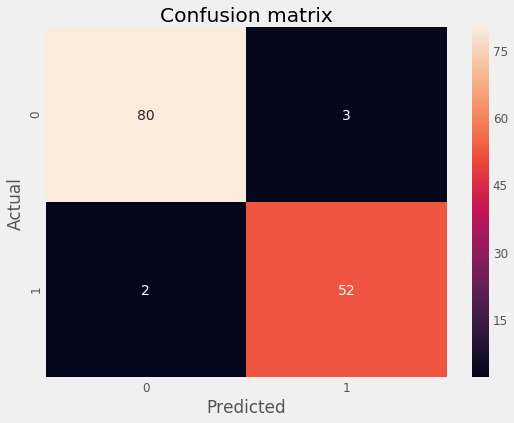

In [15]:
matplotlib.rcParams['figure.figsize'] = 8,6
cnf_matrix = confusion_matrix(y_test, pred, labels = [2,4])
ax =sns.heatmap(cnf_matrix, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Confusion matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()